<center><h1>Model about Cancer Prediction</h1></center>

<h3>Importing Libraries</h3>

Importing libraries is the initial step of every action, without it we cannot perform any action on the data.
Importing "pandas" is for reading csv file from the directory, and also perform some basic analysis.
Importing "numpy" is for performing mathematical operation on the data
Importing "matplotlib" is for analysis and for visualization of the data in the notebook. It used single or multiple columns to perform visualization and graphs.
Importing "seaborn" is also for analysis and visualization of data into graphs. Also show their corelation with each other.
After that imported model libraries from sklearn

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Now, we are going to read that csv file cointaining all the data on which we are going to perform analysis and also train a model.
After reading that file we are saving that dataframe into a datraframe variable named "df".

In [2]:
df = pd.read_csv('cancer.csv')

<h2>Exploratory Data Analysis</h2>

<h3>Basic Analysis</h3>

Here is the sample display of the dataframe containing all data/information.
This sample data contains unique random rows of the dataset.

In [3]:
df.sample(10)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
114,114,P200,26,2,8,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
904,904,P912,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
659,659,P692,26,2,7,7,7,7,7,6,...,2,7,6,7,6,7,2,3,1,High
586,586,P626,42,1,2,4,5,6,5,5,...,8,7,7,3,8,9,1,6,2,High
890,890,P90,26,2,7,7,7,7,7,6,...,2,7,6,7,6,7,2,3,1,High
301,301,P37,42,1,2,1,2,3,4,3,...,1,1,1,2,1,2,3,1,2,Low
386,386,P446,55,2,2,1,2,1,2,1,...,3,4,5,1,3,2,1,2,2,Low
714,714,P741,24,2,1,2,2,3,2,4,...,1,1,1,2,3,4,5,2,1,Low
569,569,P610,27,2,3,1,4,2,3,2,...,2,2,3,4,1,5,2,6,2,Low
256,256,P329,25,2,3,1,4,3,2,3,...,3,2,2,4,2,2,3,4,3,Low


Lets do Label encode to the dataset

In [5]:
label = LabelEncoder()

Encoding the two columns of dataset

In [7]:
df['Patient Id'] = label.fit_transform(df['Patient Id'])
df['Level'] = label.fit_transform(df['Level'])

Here is the head of the dataframe, which means that starting rows of the dataframe. It doesn't means that they should be unique, but it can be.

In [8]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,0,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,1
1,1,1,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,2
2,2,2,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,0
3,3,3,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,0
4,4,4,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,0


Here is the tail of the dataset, which means that ending rows of the dataset. It doesn't means that it should be unique but it can be.

In [9]:
df.tail()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
995,995,995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,0
996,996,996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,0
997,997,997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,0
998,998,998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,0
999,999,999,47,1,6,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,0


Here is the basic information of the dataset, it includes value counts, datatypes and empty rows imformation.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   index                     1000 non-null   int64
 1   Patient Id                1000 non-null   int64
 2   Age                       1000 non-null   int64
 3   Gender                    1000 non-null   int64
 4   Air Pollution             1000 non-null   int64
 5   Alcohol use               1000 non-null   int64
 6   Dust Allergy              1000 non-null   int64
 7   OccuPational Hazards      1000 non-null   int64
 8   Genetic Risk              1000 non-null   int64
 9   chronic Lung Disease      1000 non-null   int64
 10  Balanced Diet             1000 non-null   int64
 11  Obesity                   1000 non-null   int64
 12  Smoking                   1000 non-null   int64
 13  Passive Smoker            1000 non-null   int64
 14  Chest Pain                1000 non-null  

Here is the more information about the dataset. Describe shows the mean, avg, percentages, etc of the dataset columns.

In [11]:
df.describe()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,0.96700
std,288.819436,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.83463
min,0.000000,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
25%,249.750000,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.00000
50%,499.500000,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.00000
75%,749.250000,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.00000
max,999.000000,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.00000


By manually analyzing, we can say that the target class is Level, as it includes status of the cancer. Let's have analysis on the whole dataset on the basis of the target class.

<h3>Univariate Analysis</h3>

Univariate analysis means that analysis made on single column

Lets get the percentage of the target class. By pie chart we can easily get the percentage and numbers of the target class or any class

<Axes: ylabel='Level'>

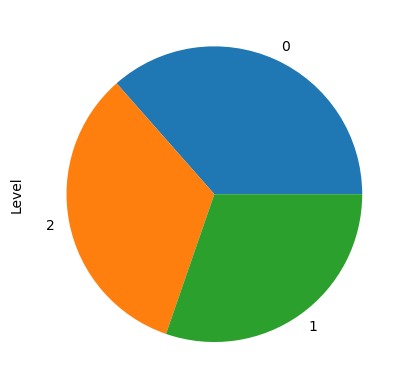

In [13]:
df['Level'].value_counts().plot(kind='pie')

Lets draw a histogram on a single column.
It shows the histology of the data on a graph
And we use this to get the frequency of the data in the dataframe

(array([365.,   0.,   0.,   0.,   0., 303.,   0.,   0.,   0., 332.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

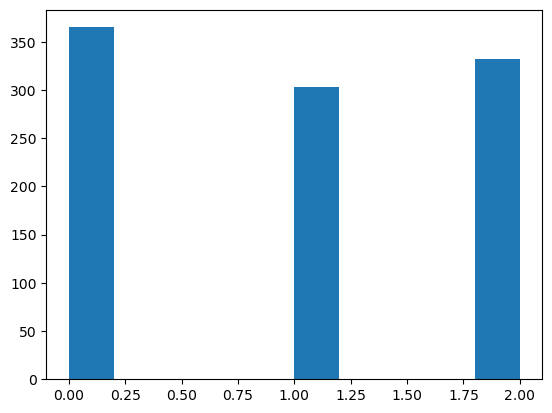

In [14]:
plt.hist(df['Level'])

Lets draw a distribution plot on the same data. It shows the distribution among the values of the column. And we use this to get the distribution among the frequency of the dataset.
Setting histogram to false means that excluding the histogram from the graph

/var/folders/bh/phg5j6rx557fc31zr9pgztnr0000gn/T/ipykernel_3224/2772353481.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Smoking'], hist=False)


<Axes: xlabel='Smoking', ylabel='Density'>

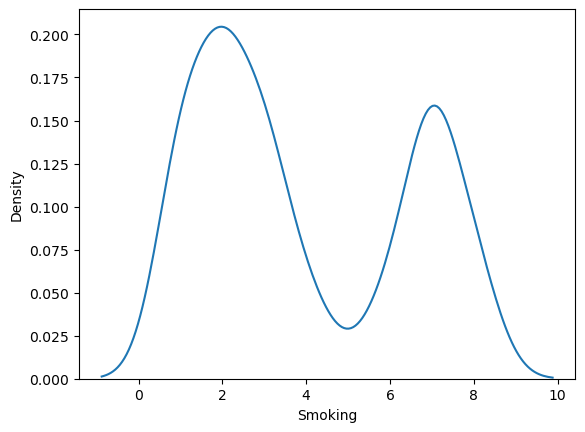

In [15]:
sns.distplot(df['Smoking'], hist=False)

Histogram on page rank column to check the frequency of the data.

<Axes: xlabel='Dry Cough', ylabel='Count'>

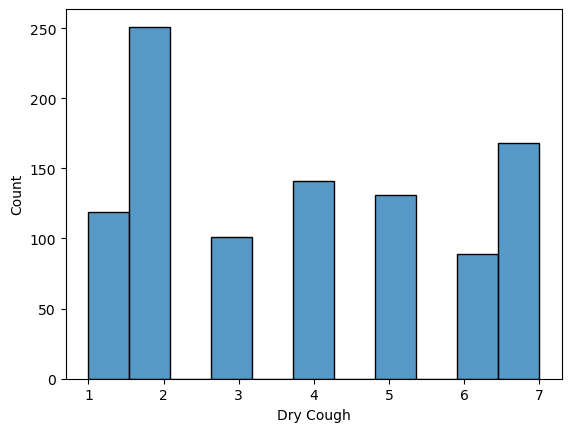

In [16]:
sns.histplot(df['Dry Cough'])

Plotting box plot: This shows the outliers of the data. The outliers are not acceptable for the accurate model. So we have to detect them.

<Axes: >

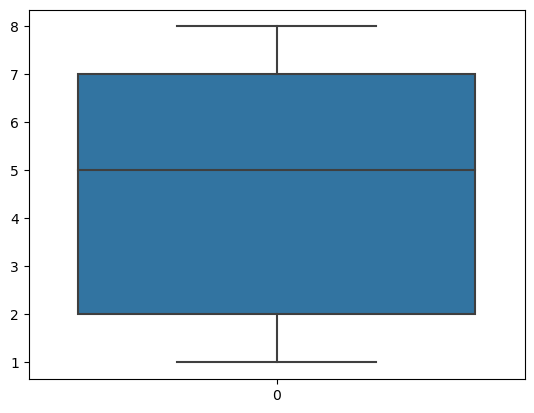

In [17]:
sns.boxplot(df['Alcohol use'])

Also check the outliers of the domain age

<Axes: >

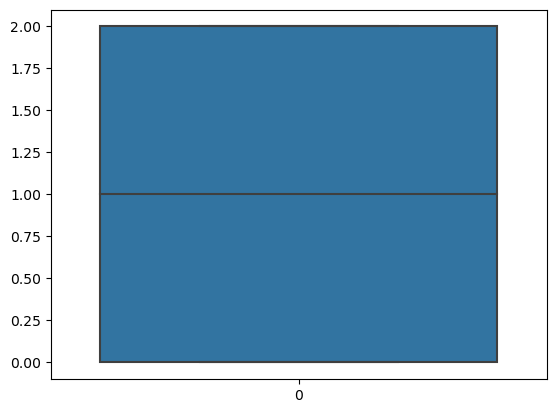

In [18]:
sns.boxplot(df['Level'])

Lets plot a scatter plot to get the values at different points of the graph
The dark lines shows that there are more points that means it shows the distribution of the values at different points

<Axes: ylabel='Level'>

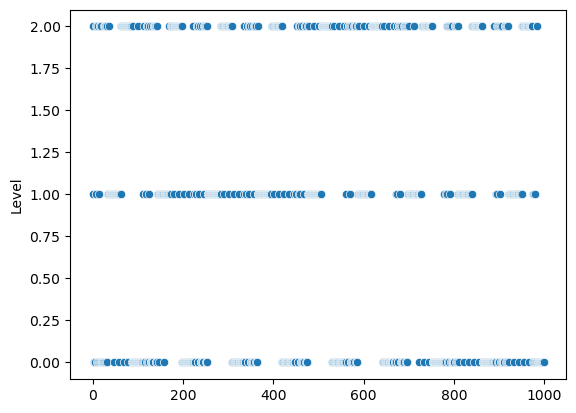

In [19]:
sns.scatterplot(df['Level'])

If we do scatter plot for the target class we will get equal distribution at two lines

<Axes: ylabel='Coughing of Blood'>

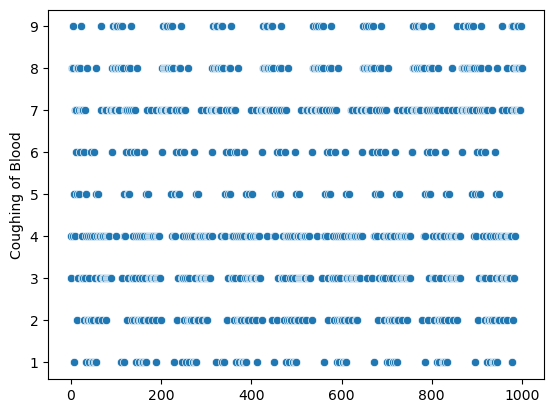

In [20]:
sns.scatterplot(df['Coughing of Blood'])

We can see the distributions by bar plot

<h3>Bivariate Analysis</h3>

In bivariate analysis, we do analysis by comparising two columns on the basis of their corelation.
And we also examine the corelation among the two columns.

In [21]:
df.sample(10)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
993,993,993,37,2,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,0
754,754,754,33,1,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,0
846,846,846,32,1,1,6,7,5,3,2,...,3,3,7,7,4,8,7,7,5,2
269,269,269,35,1,1,3,2,4,2,6,...,4,2,2,2,3,2,1,2,4,1
646,646,646,53,1,6,8,7,7,6,7,...,5,2,5,2,3,2,1,7,6,0
384,384,384,43,2,4,2,3,4,2,3,...,1,3,4,2,4,2,4,3,1,1
819,819,819,48,1,4,2,3,2,1,2,...,2,6,1,2,4,2,1,2,3,1
483,483,483,45,2,1,2,4,5,6,5,...,3,8,7,3,8,3,2,3,1,1
892,892,892,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,0
354,354,354,53,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,0


Let's plot scatter plot on two columns on the basis of the relation.
This is to be done to show the relation between the two columns.

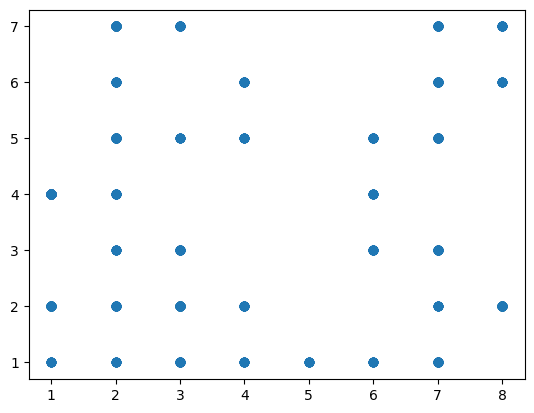

In [22]:
plt.scatter(x = df['Smoking'], y = df['Dry Cough'])

Let's plot a scatter plot of the target class with the other class to get the relation of the classes

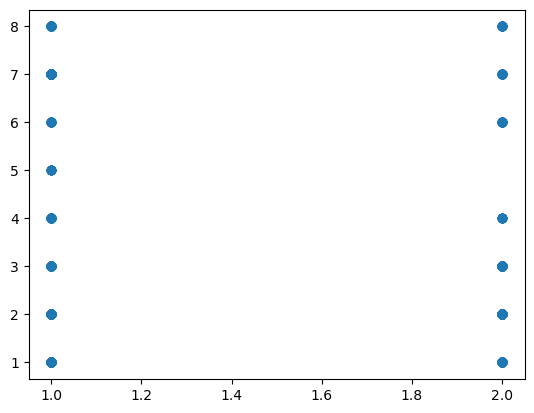

In [23]:
plt.scatter(x = df['Gender'], y = df['Smoking'])

Now, lets draw a scatter plot of two different classes with hue of the target class

<Axes: xlabel='Smoking', ylabel='Level'>

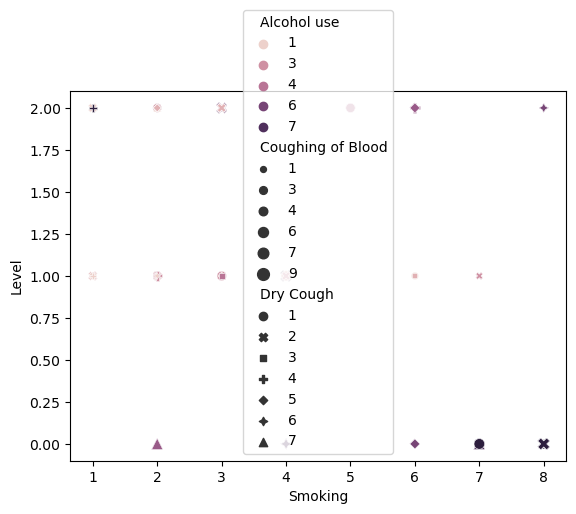

In [24]:
sns.scatterplot(x = df['Smoking'], y = df['Level'], hue = df['Alcohol use'], style = df['Dry Cough'], size = df['Coughing of Blood'])

Draw barplot having hue of the target class

<Axes: xlabel='Dry Cough', ylabel='Alcohol use'>

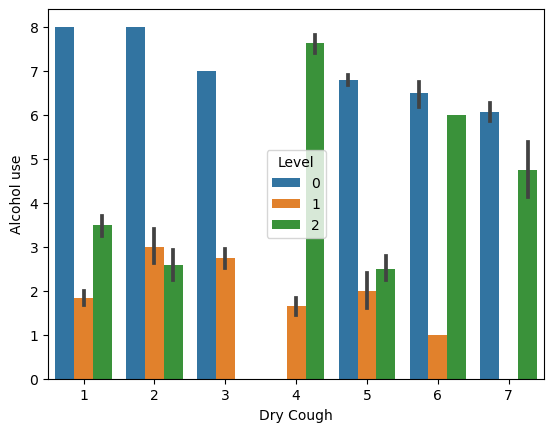

In [25]:
sns.barplot(x = df['Dry Cough'], y = df['Alcohol use'], hue = df['Level'])

Lets draw a boxplot on two columns with hue of the class.
We do this to detect the outliers of the dataset in different classes.
These outliers usually effect the dataset's accuracy and processing.

<Axes: xlabel='Dry Cough', ylabel='Level'>

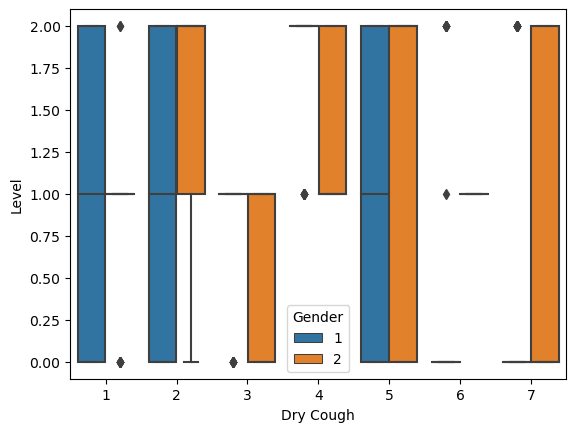

In [27]:
sns.boxplot(x = df['Dry Cough'], y = df['Level'], hue = df['Gender'])

Distribution plot is for getting the frequency of the data on a graph

<Axes: xlabel='Level', ylabel='Smoking'>

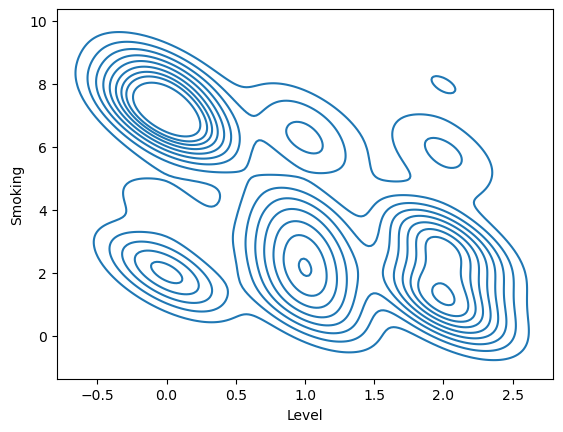

In [28]:
sns.kdeplot(x = df['Level'], y = df['Smoking'])

Draw a heatmap to get the corelated columns and useful features

<Axes: xlabel='Passive Smoker', ylabel='Level'>

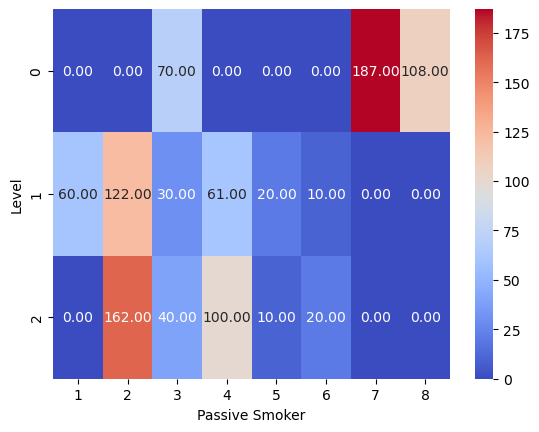

In [29]:
sns.heatmap(pd.crosstab(df['Level'],df['Passive Smoker']), annot=True, cmap='coolwarm', fmt=".2f")

<h3>Multi-variate Analysis</h3>

Lets do multivariate analysis on the dataset in this analysis we will have analysis on all of the columns with all of the relation with all of them

Calculating the distributions of the data to get an efficient heatmap.
Dividing dataframe into 3 parts

In [30]:
dist_df = int(np.ceil(25/3))
df1 = df[:dist_df]
df1 = df[df.columns[:dist_df]]
df2 = df[df.columns[dist_df:dist_df+dist_df]]
df3 = df[df.columns[dist_df+dist_df:]]

Let's draw heatmap so that we can have complete analysis of the featues and then we will remove the non essential features from the data to get efficient accuracy.
This is not accurate solution so we are going to perform it on specific columns

<Axes: >

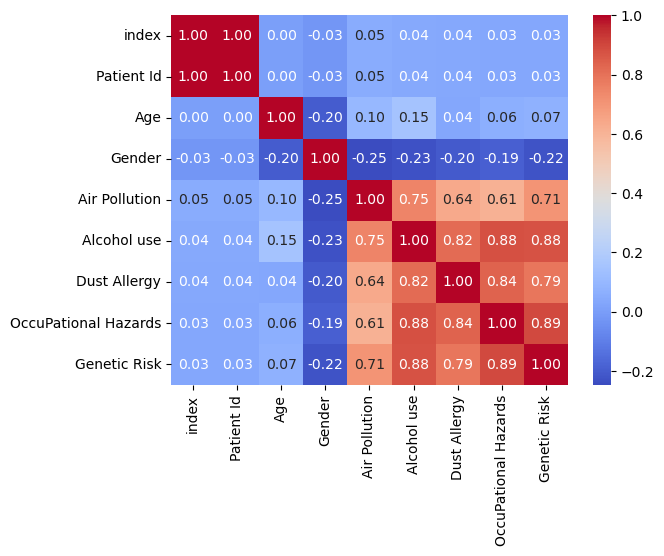

In [31]:
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".2f")

Let's draw heatmap for another one so that we can have complete analysis of the featues and then we will remove the non essential features from the data to get efficient accuracy.
This is not accurate solution so we are going to perform it on specific columns

<Axes: >

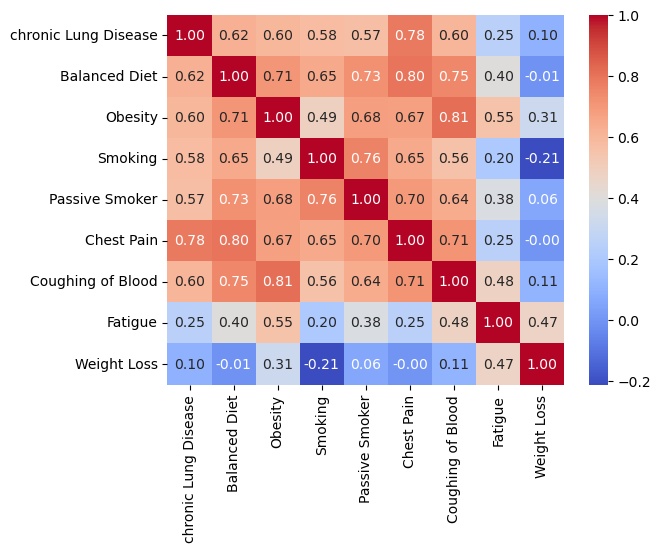

In [32]:
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt=".2f")

Let's draw heatmap for another one so that we can have complete analysis of the featues and then we will remove the non essential features from the data to get efficient accuracy.
This is not accurate solution so we are going to perform it on specific columns

<Axes: >

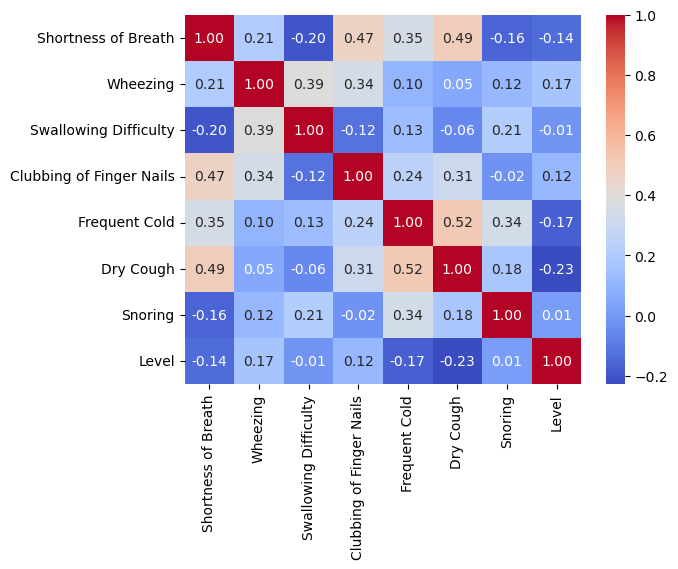

In [33]:
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm', fmt=".2f")

<Axes: >

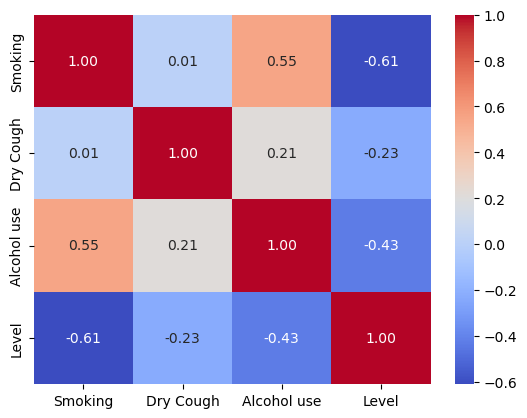

In [34]:
sample_df = df[['Smoking','Dry Cough','Alcohol use','Level']]
sns.heatmap(sample_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

Lets draw a pairplot to get multivariate analysis

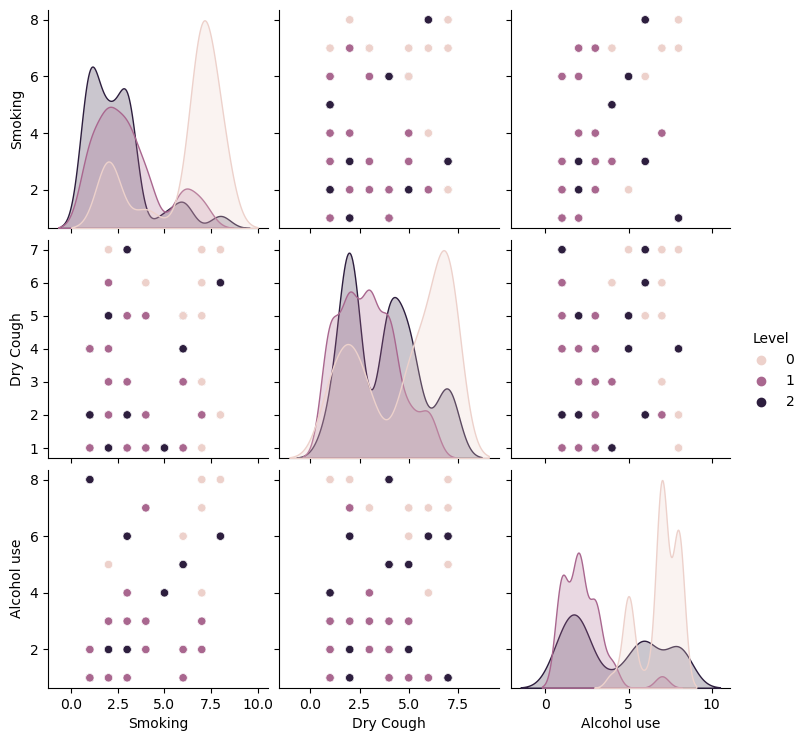

In [35]:
sns.pairplot(sample_df, hue = 'Level')

<h2>Aplying Algorithm</h2>

"x" contains all the data exluding the target class

In [36]:
x = df.drop(columns = 'Level')

"y" contains the target class

In [37]:
y = df['Level']

Now split the data into training and testing

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

Creating Random Forest object

In [45]:
rf_classifier = RandomForestClassifier(n_estimators=12, random_state=42)

Training model on training data

In [46]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=12, random_state=42)

This will get the predicion of the model from the texting data

In [47]:
y_pred = rf_classifier.predict(x_test)

Let's get the accuracy of the model

In [48]:
accuracy = accuracy_score(y_test, y_pred)

This will show the accuracy of the model multiplying it by 100

In [49]:
print("Accuracy:", accuracy*100)

Accuracy: 100.0


<h2>Visualization</h2>

Lets visualize the predicted data to show the progress

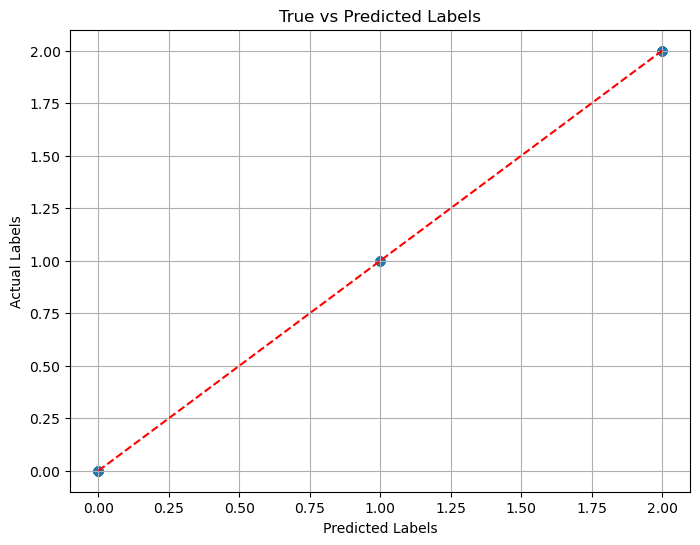

In [58]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('True vs Predicted Labels')
plt.grid(True)
plt.show()

Visualization on distribution plot

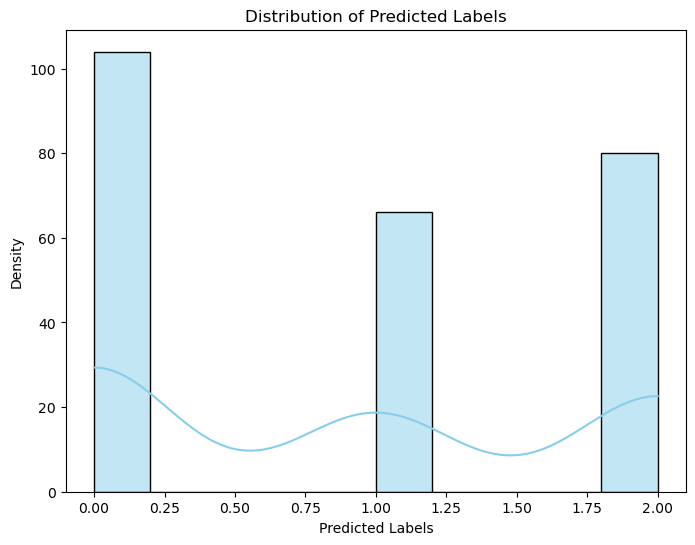

In [59]:
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, bins=10, kde=True, color='skyblue')
plt.xlabel('Predicted Labels')
plt.ylabel('Density')
plt.title('Distribution of Predicted Labels')
plt.show()

<h2>Classification Report</h2>

Generate classification report get information about
Percision
Recall
F1_score
Support

In [60]:
report = classification_report(y_test, y_pred)

Show the report

In [61]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00        80

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



<h2>Confusion Matrix</h2>

Creating confusion matrix of the predicted data

In [62]:
conf_matrix = confusion_matrix(y_test, y_pred)

Showing confusion matrix

In [63]:
print(conf_matrix)

[[104   0   0]
 [  0  66   0]
 [  0   0  80]]


This is how a confusion matrix looks like

Visualizing the confusion matrix

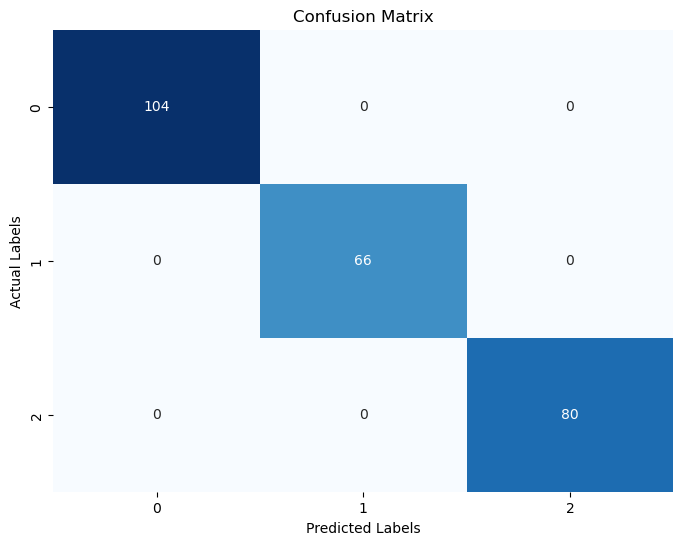

In [64]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()